# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Gibran Malik Naabih Andito
- **Email:** gibranmalik55@gmail.com
- **ID Dicoding:** MC245D5Y0648

## Menentukan Pertanyaan Bisnis

1 Pola peminjaman sepeda sepanjang hari dan perbedaan hari kerja vs akhir pekan.

2 Pengaruh cuaca, suhu, dan kelembaban terhadap jumlah peminjaman sepeda.

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [4]:
# Load dataset
file_path = '/content/drive/MyDrive/Projek Akhir Belajar analisis data menggunakan python/hour.csv'

df = pd.read_csv(file_path)
df.head()

# Cek info dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


**Insight:**
- menambahkan data dengan melihat nilai yang hilang yang ternyata tidak ada

### Assessing Data

instant         0
dteday          0
season          0
yr              0
mnth            0
hr              0
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
weekday_name    0
weekend         0
day_type        0
dtype: int64
Jumlah data duplikat: 0


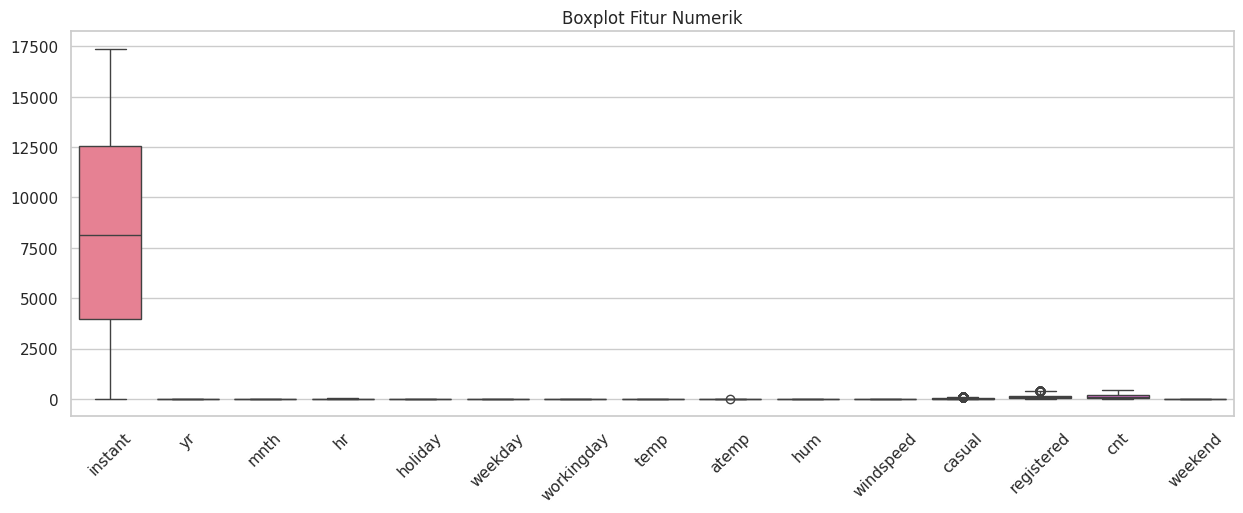

,instant,dteday,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,weekend
count,13668.000000,13668,13668.000000,13668.000000,13668.000000,13668.0,13668.00000,13668.000000,13668.000000,13668.000000,13668.000000,13668.000000,13668.000000,13668.000000,13668.000000,13668.000000
mean,8310.934958,2011-12-17 08:05:22.388059648,0.464516,6.473003,10.890108,0.0,3.01017,0.735660,0.472293,0.454767,0.652981,0.178332,19.862818,107.235221,127.098039,0.264340
min,1.000000,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.0,0.00000,0.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3944.750000,2011-06-18 00:00:00,0.000000,3.000000,4.000000,0.0,1.00000,0.000000,0.320000,0.318200,0.510000,0.104500,3.000000,24.000000,28.000000,0.000000
50%,8122.500000,2011-12-10 00:00:00,0.000000,6.000000,10.000000,0.0,3.00000,1.000000,0.460000,0.454500,0.660000,0.164200,11.000000,89.000000,106.000000,0.000000
75%,12545.250000,2012-06-11 00:00:00,1.000000,10.000000,17.000000,0.0,5.00000,1.000000,0.620000,0.590900,0.810000,0.253700,31.000000,165.000000,203.000000,1.000000
max,17379.000000,2012-12-31 00:00:00,1.000000,12.000000,23.000000,0.0,6.00000,1.000000,0.960000,1.000000,1.000000,0.462700,85.000000,390.000000,462.000000,1.000000
std,5046.391138,NaN,0.498758,3.550687,7.270606,0.0,1.94994,0.440997,0.188423,0.168981,0.187244,0.111838,21.636926,93.498371,108.196614,0.440997


In [12]:
# Cek missing value
print(df.isnull().sum())

# Cek data duplikat
print("Jumlah data duplikat:", df.duplicated().sum())

# Boxplot untuk mendeteksi outlier
datanum=df.select_dtypes(include='number')
plt.figure(figsize=(15, 5))
sns.boxplot(datanum)
plt.title("Boxplot Fitur Numerik")
plt.xticks(rotation=45)
plt.show()

df.describe()

**Insight:**
- dapat dilihat bahwa tidak ada nilai yang hilang
- tidak terdapat nilai yang duplikat
- terdapat beberapa kolom yang memiliki outlier seperti 'holiday', 'weathersit', 'hum', 'windspeed', 'casual', 'registered', 'cnt'

### Cleaning Data

In [11]:
# Deteksi dan Penanganan Outlier (Metode IQR)
numerical_cols = ['holiday', 'weathersit', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

print("\nJumlah data sebelum outlier removal:", df.shape)
df = remove_outliers_iqr(df, numerical_cols)
print("Jumlah data setelah outlier removal:", df.shape)

# Mapping label kategori
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_map = {1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}

df['season'] = df['season'].map(season_map)
df['weathersit'] = df['weathersit'].map(weather_map)


Jumlah data sebelum outlier removal: (14534, 20)
Jumlah data setelah outlier removal: (13668, 20)


**Insight:**
- data yang memiliki outlier dihapuskan untuk outliernya
- menambahkan kolom untuk penamaan musim dan cuaca

## Exploratory Data Analysis (EDA)

### Explore ...

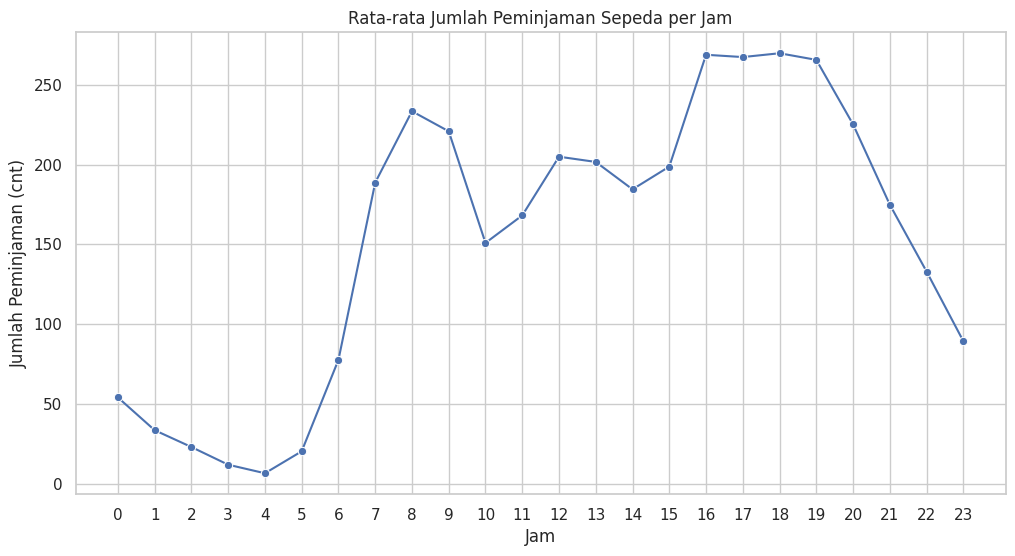

<ipython-input-8-79fb08cb6220>:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='hr', y='cnt', hue='day_type', ci=None)


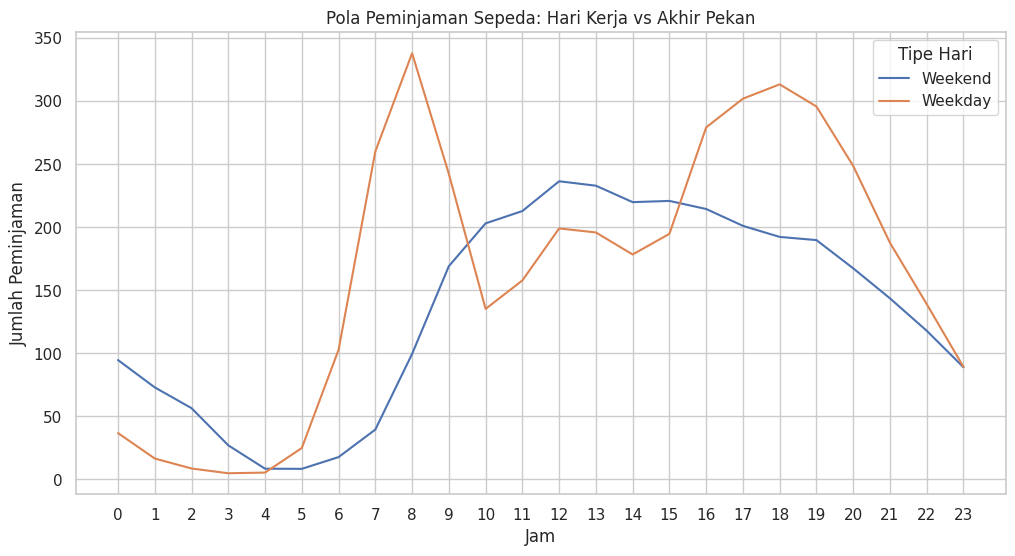

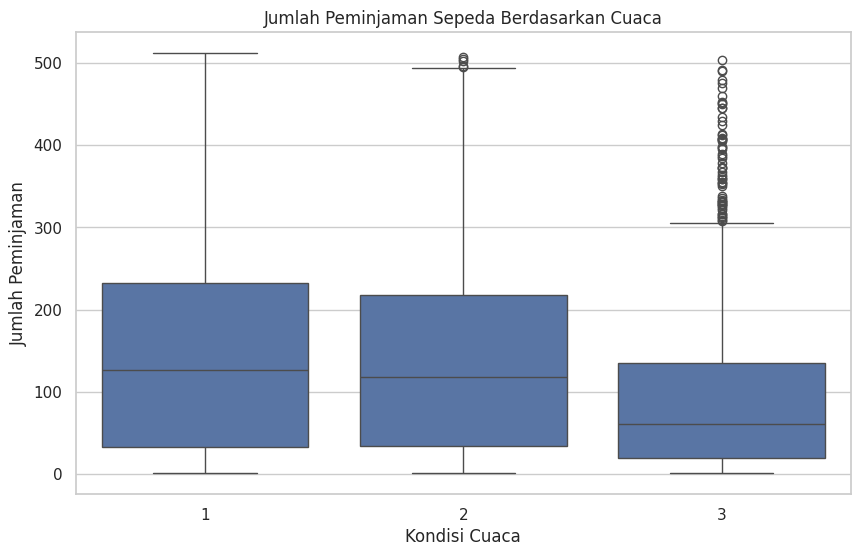

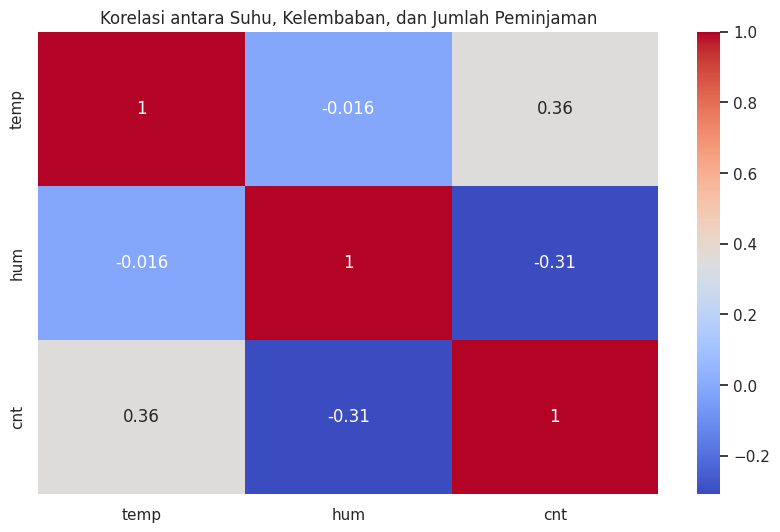

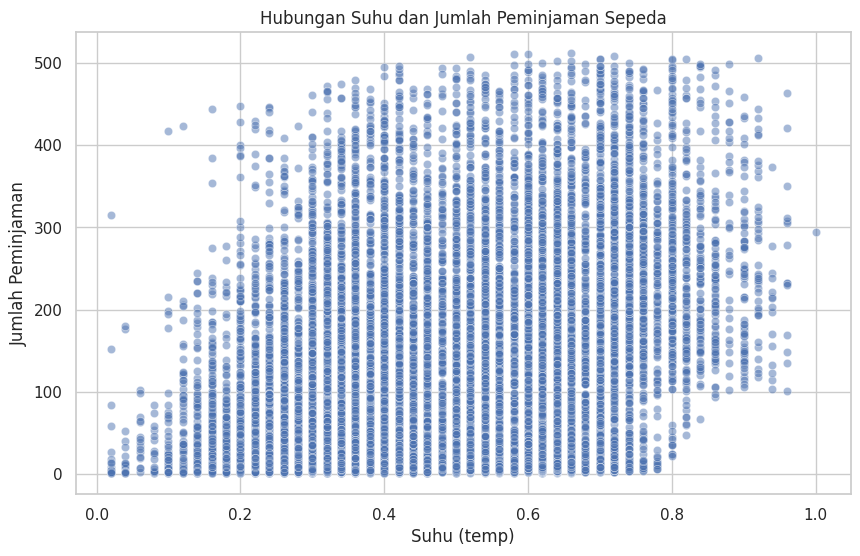

In [8]:
df['dteday'] = pd.to_datetime(df['dteday'])
# Tambahkan kolom nama hari
df['weekday_name'] = df['dteday'].dt.day_name()

# Tandai hari kerja vs akhir pekan
df['weekend'] = df['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)  # 0: Minggu, 6: Sabtu

#pertanyaan 1
# Set style
sns.set(style="whitegrid")

# Rata-rata peminjaman per jam
hourly_rentals = df.groupby('hr')['cnt'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_rentals, x='hr', y='cnt', marker='o')
plt.title('Rata-rata Jumlah Peminjaman Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman (cnt)')
plt.xticks(range(0, 24))
plt.show()

# Rata-rata per jam dibedakan berdasarkan hari kerja / akhir pekan
df['day_type'] = df['weekend'].map({0: 'Weekday', 1: 'Weekend'})

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hr', y='cnt', hue='day_type', ci=None)
plt.title('Pola Peminjaman Sepeda: Hari Kerja vs Akhir Pekan')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(range(0, 24))
plt.legend(title='Tipe Hari')
plt.show()

#pertanyaan 2
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='weathersit', y='cnt')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.show()

# Korelasi suhu, kelembaban, dan jumlah peminjaman
plt.figure(figsize=(10, 6))
sns.heatmap(df[['temp', 'hum', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antara Suhu, Kelembaban, dan Jumlah Peminjaman')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temp', y='cnt', alpha=0.5)
plt.title('Hubungan Suhu dan Jumlah Peminjaman Sepeda')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Peminjaman')
plt.show()


**Insight:**
- dapat dilihat bahwa terjadi lonjakan disaat suhu tertentu dan di jam tertentu saja

## Visualization & Explanatory Analysis

### Pertanyaan 1:

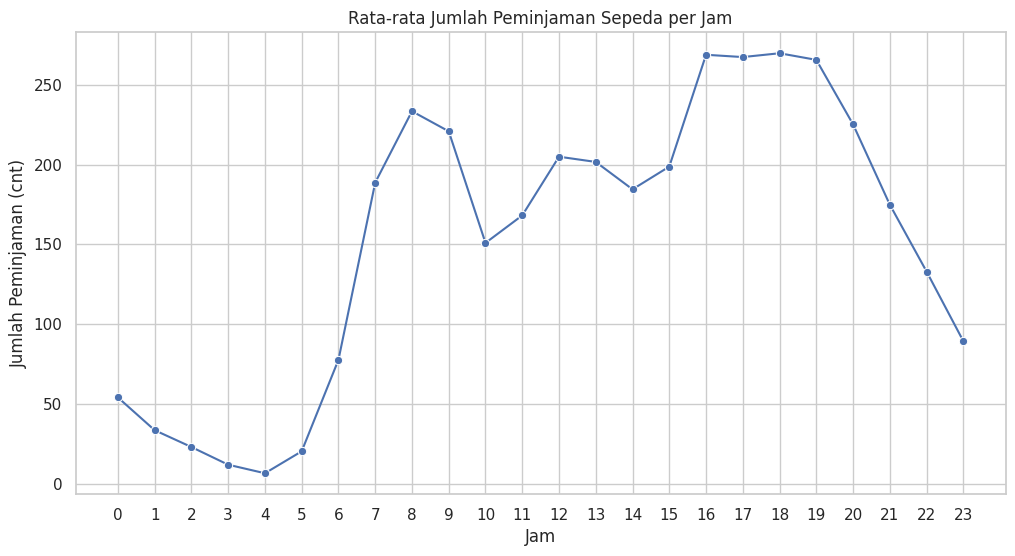

<ipython-input-9-fcdfdf3d5434>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='hr', y='cnt', hue='day_type', ci=None)


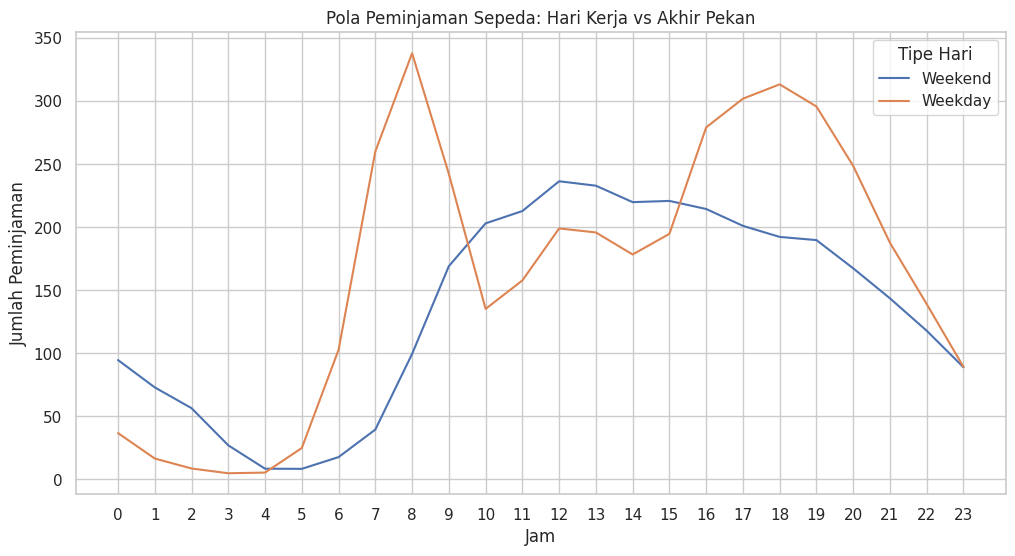

In [9]:
# Visualisasi sebelumnya
hourly_rentals = df.groupby('hr')['cnt'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_rentals, x='hr', y='cnt', marker='o')
plt.title('Rata-rata Jumlah Peminjaman Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman (cnt)')
plt.xticks(range(0, 24))
plt.show()

df['day_type'] = df['weekend'].map({0: 'Weekday', 1: 'Weekend'})

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hr', y='cnt', hue='day_type', ci=None)
plt.title('Pola Peminjaman Sepeda: Hari Kerja vs Akhir Pekan')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(range(0, 24))
plt.legend(title='Tipe Hari')
plt.show()

### Pertanyaan 2:

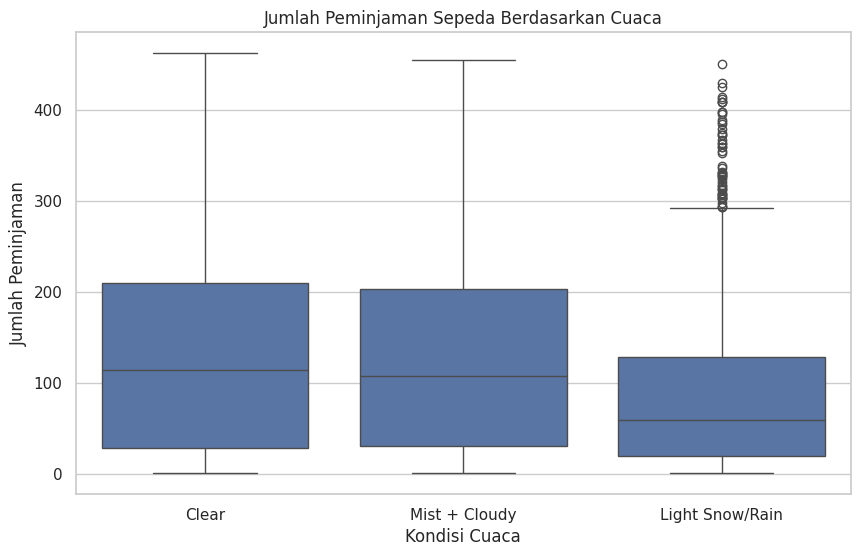

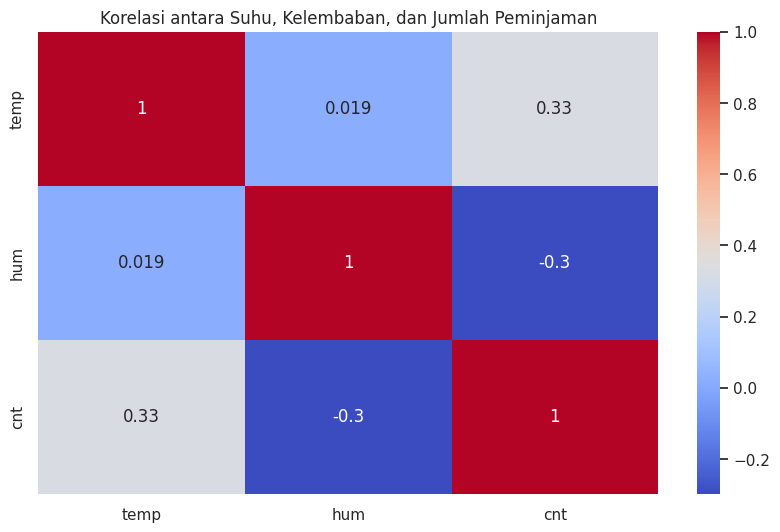

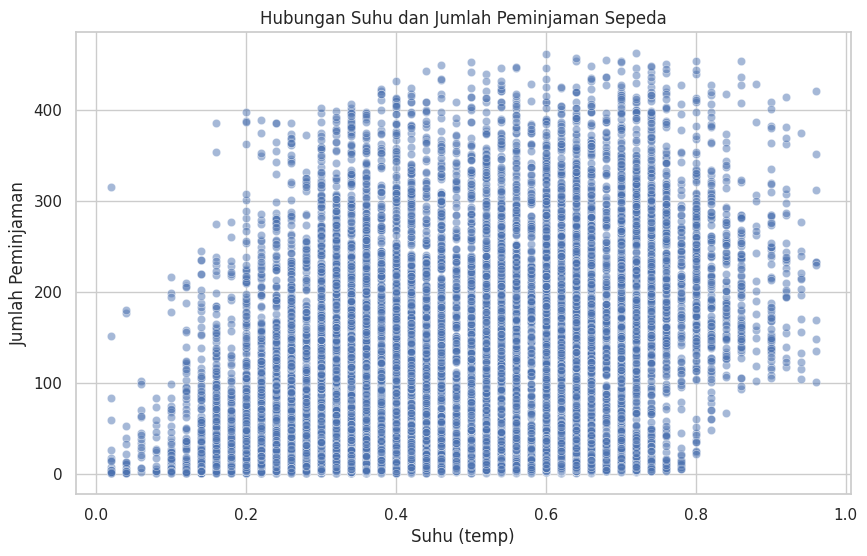

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='weathersit', y='cnt')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df[['temp', 'hum', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antara Suhu, Kelembaban, dan Jumlah Peminjaman')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temp', y='cnt', alpha=0.5)
plt.title('Hubungan Suhu dan Jumlah Peminjaman Sepeda')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Peminjaman')
plt.show()

**Insight:**
- dapat dilihat bahwa lonjakan terjadi pada hari minggu dan juga di jam tertentu saja
- jumlah peminjaman sepeda dengan suhu memiliki kolerasi yang cukup kuat, dapat dilihat bahwa di range 0.4-0.6 terjadi lonjakan yang banyak. sedangkan jika terlalu tinggi atau terlalu rendah mengalami penurunan

## Analisis Lanjutan (Opsional)

## Conclusion

pertanyaan

1 Pola peminjaman sepeda sepanjang hari dan perbedaan hari kerja vs akhir pekan.

2 Pengaruh cuaca, suhu, dan kelembaban terhadap jumlah peminjaman sepeda.

jawaban

Conclution pertanyaan 1

didapati bahwa hari dan jam juga mempengaruhi peminjaman sepeda, pada grafik terlihat bahwa hari minggu terjadi peningkatan lebih banyak yang meminjam sepeda

Conclution pertanyaan 2

peminjaman ini ada kolerasi dengan cuaca dan juga dengan tempratur/suhu. jika cuaca bagus dan tempratur/suhu yang pas, akan banyak yang meminjam sepedanya. sedangkan jika cuacanya buruk dan memiliki tempratur/suhu yang terlalu tinggi/rendah akan sedikit yang meminjam sepeda